In [ ]:
import pandas as pd

In [ ]:
spot = pd.read_csv('top_100_from_2000_to_2019.csv')
spot

,id,year,top_100_rank,track_name,artist,explicit,duration_ms,popularity,album_name,album_type,release_date,num_tracks_in_album
0,1,2000,1,Oops!...I Did It Again,Britney Spears,False,211160,74,Oops!... I Did It Again,album,2000-05-16,12
1,2,2000,2,All The Small Things,blink-182,False,167066,77,Enema Of The State,album,1999-06-01,12
2,3,2000,3,Breathe,Faith Hill,False,250546,63,Breathe,album,1999-11-09,13
3,4,2000,4,It's My Life,Bon Jovi,False,224493,76,Crush,album,2000-01-01,12
4,5,2000,5,Bye Bye Bye,*NSYNC,False,200400,67,No Strings Attached,album,2000-03-21,12
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,2019,96,Motivation,Normani,False,193837,66,Motivation,single,2019-08-16,1
1996,1997,2019,97,Lost Without You,Freya Ridings,False,225853,65,Freya Ridings,album,2019-07-19,12
1997,1998,2019,98,Ladbroke Grove,AJ Tracey,False,190537,65,AJ Tracey,album,2019-02-08,15
1998,1999,2019,99,Clout (feat. Cardi B),Offset,True,205803,65,FATHER OF 4,album,2019-02-22,16


In [ ]:
from scipy import stats

In [ ]:
sp = spot.groupby('year').agg({'popularity':'mean','duration_ms':'mean','num_tracks_in_album':'mean'}).reset_index()

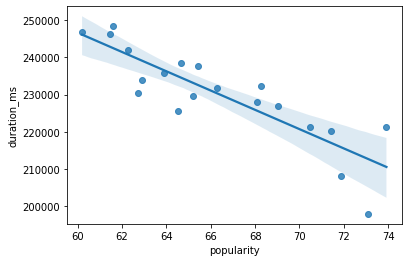

In [ ]:
import seaborn as sns
sns.regplot(data=sp, x="popularity",y="duration_ms")


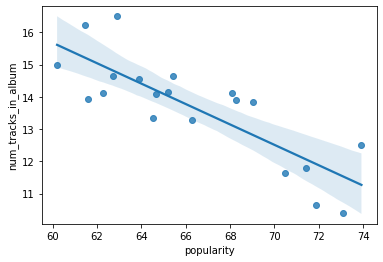

In [ ]:

sns.regplot(data=sp, x="popularity",y="num_tracks_in_album")

In [ ]:
(r,p) = stats.pearsonr(sp['popularity'], sp['duration_ms'])
print('r =', r, 'p =', p)

r = -0.8592084479937527 p = 1.224343614707909e-06


In [ ]:
(r,p) = stats.pearsonr(sp['popularity'], sp['num_tracks_in_album'])
print('r =', r, 'p =', p)

r = -0.8211089364284496 p = 9.124705002736787e-06


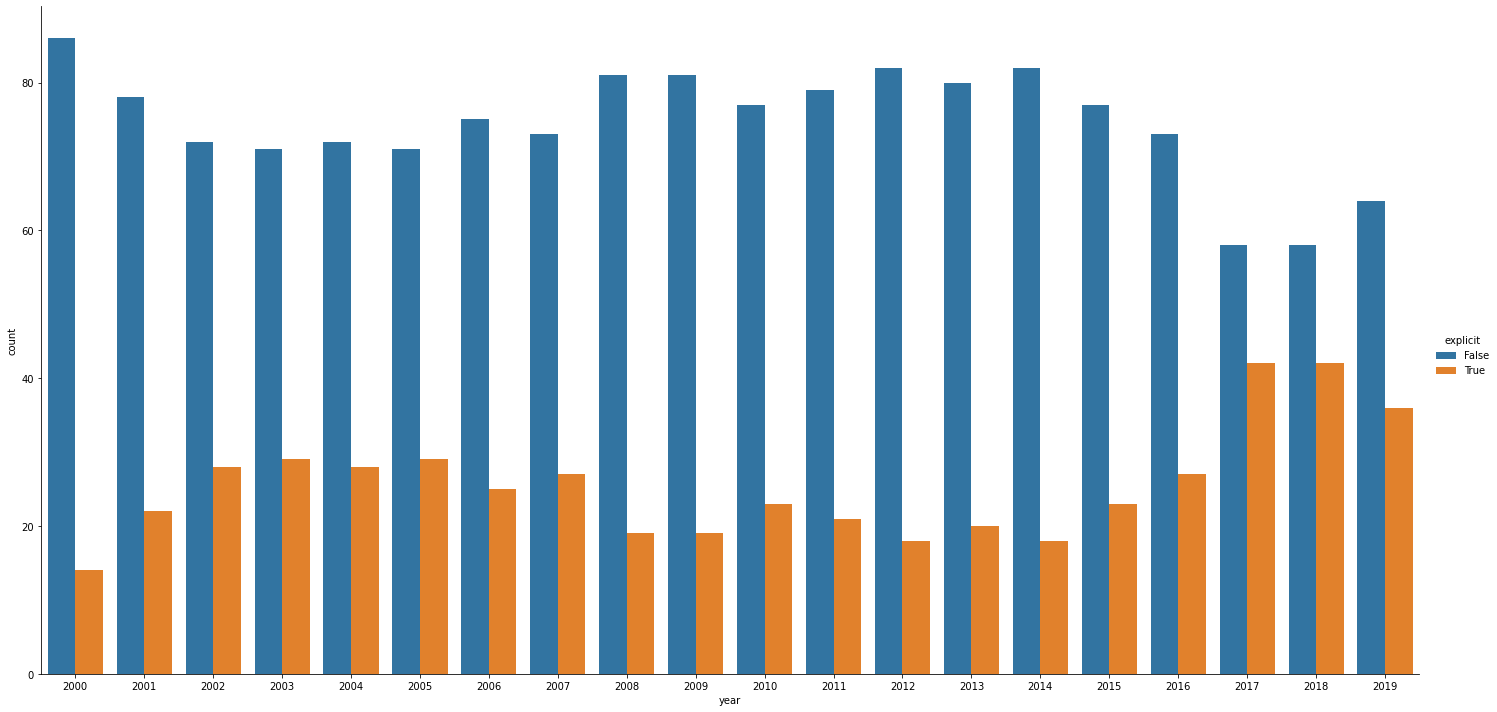

In [ ]:
catspot = sns.catplot(x='year', hue='explicit', data=spot, kind='count', height=10, aspect=2)

In [18]:
type(spot['year'][0])

numpy.int64

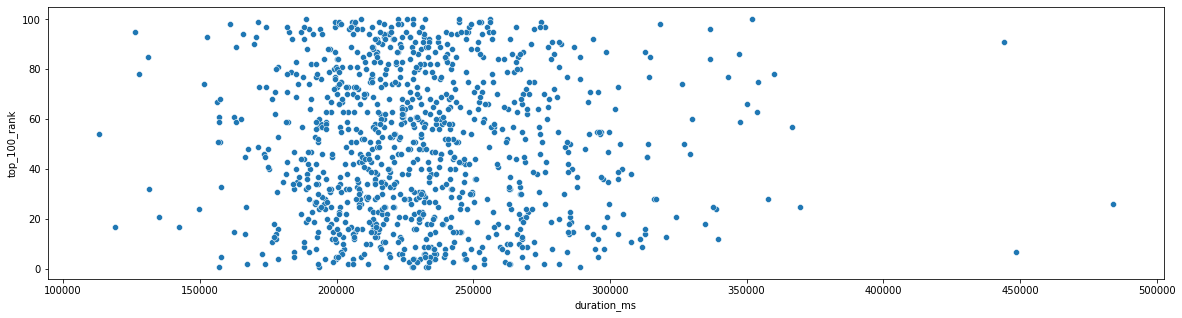

In [36]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 5))
sns.scatterplot(x='duration_ms',y='top_100_rank',data = spot.sample(frac=0.5))

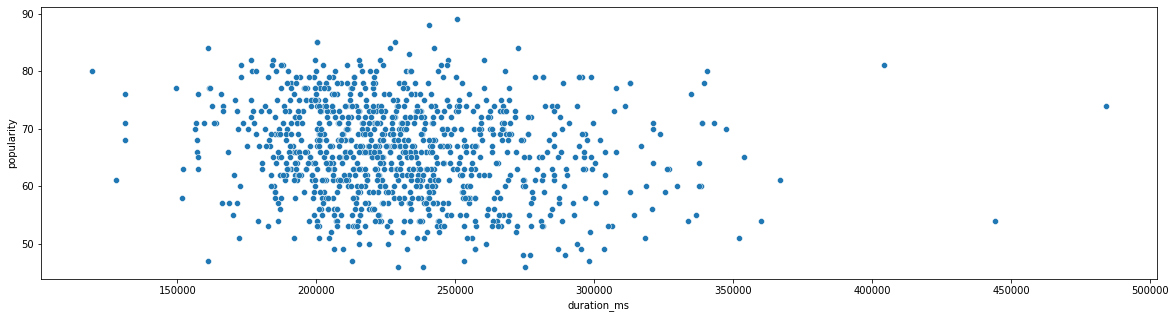

In [37]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 5))
sns.scatterplot(x='duration_ms',y='popularity',data = spot.sample(frac=0.5))

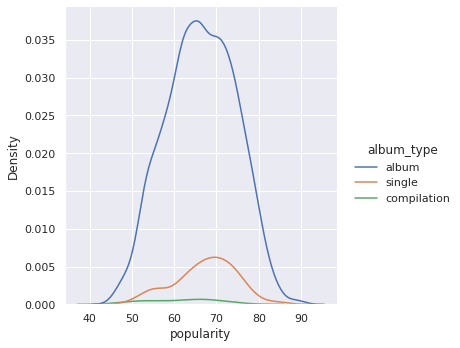

In [41]:
sns.set(rc={"figure.figsize": (15, 8)})
sns.displot(data=spot, x='popularity', hue='album_type', kind='kde')

In [40]:
display(stats.ttest_ind(spot[spot.album_type == 'album'].popularity, spot[spot.album_type == 'compilation'].popularity))

Ttest_indResult(statistic=3.189054889177136, pvalue=0.0014523138238968284)

In [42]:
display(stats.ttest_ind(spot[spot.album_type == 'album'].popularity, spot[spot.album_type == 'single'].popularity))

Ttest_indResult(statistic=-1.8590935618173179, pvalue=0.06316303833064124)

In [43]:
display(stats.ttest_ind(spot[spot.album_type == 'single'].popularity, spot[spot.album_type == 'compilation'].popularity))

Ttest_indResult(statistic=4.134447073498932, pvalue=4.843306324924051e-05)